In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression using numpy

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.11692642],
       [2.88498243]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.11692642],
       [9.88689127]])

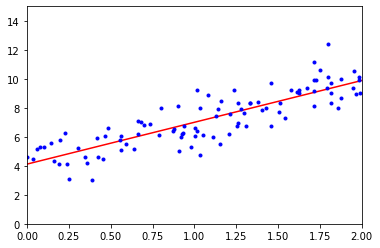

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Linear Regression using Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.11692642]), array([[2.88498243]]))

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.11692642],
       [2.88498243]])

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.11692642],
       [2.88498243]])

# Batch Gradient Descent

In [11]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
print(theta)

[[4.11692642]
 [2.88498243]]


# Stochastic Gradient Descent (Numpy)

In [12]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyper-parameters

In [13]:
def learning_schedule(t):
    return t0 / (t + t1)

In [14]:
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[4.12343835]
 [2.83196789]]


# Stochastic Gradient Descent (Scikit-Learn)

In [15]:
from sklearn.linear_model import SGDRegressor

In [16]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.12998234]), array([2.93416818]))

# Mini-batch Gradient Descent